In [1]:
import numpy as np 
import pandas as pd 
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)

pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points

In [2]:
def flags_info():
    ''' 
1. Title: Flag database

2. Source Information
   -- Creators: Collected primarily from the "Collins Gem Guide to Flags":
      Collins Publishers (1986).
   -- Donor: Richard S. Forsyth 
             8 Grosvenor Avenue
             Mapperley Park
             Nottingham NG3 5DX
             0602-621676
   -- Date: 5/15/1990

3. Past Usage:
   -- None known other than what is shown in Forsyth's PC/BEAGLE User's Guide.

4. Relevant Information:
   -- This data file contains details of various nations and their flags.
      In this file the fields are separated by spaces (not commas).  With
      this data you can try things like predicting the religion of a country
      from its size and the colours in its flag.  
   -- 10 attributes are numeric-valued.  The remainder are either Boolean-
      or nominal-valued.

5. Number of Instances: 194

6. Number of attributes: 30 (overall)

7. Attribute Information:
   1. name	Name of the country concerned
   2. landmass	1=N.America, 2=S.America, 3=Europe, 4=Africa, 5=Asia, 6=Oceania
   3. zone	Geographic quadrant, based on Greenwich and the Equator
                1=NE, 2=SE, 3=SW, 4=NW
   4. area	in thousands of square km
   5. population	in round millions
   6. language 1=English, 2=Spanish, 3=French, 4=German, 5=Slavic, 6=Other 
               Indo-European, 7=Chinese, 8=Arabic, 
               9=Japanese/Turkish/Finnish/Magyar, 10=Others
   7. religion 0=Catholic, 1=Other Christian, 2=Muslim, 3=Buddhist, 4=Hindu,
               5=Ethnic, 6=Marxist, 7=Others
   8. bars     Number of vertical bars in the flag
   9. stripes  Number of horizontal stripes in the flag
  10. colours  Number of different colours in the flag
  11. red      0 if red absent, 1 if red present in the flag
  12. green    same for green
  13. blue     same for blue
  14. gold     same for gold (also yellow)
  15. white    same for white
  16. black    same for black
  17. orange   same for orange (also brown)
  18. mainhue  predominant colour in the flag (tie-breaks decided by taking
               the topmost hue, if that fails then the most central hue,
               and if that fails the leftmost hue)
  19. circles  Number of circles in the flag
  20. crosses  Number of (upright) crosses
  21. saltires Number of diagonal crosses
  22. quarters Number of quartered sections
  23. sunstars Number of sun or star symbols
  24. crescent 1 if a crescent moon symbol present, else 0
  25. triangle 1 if any triangles present, 0 otherwise
  26. icon     1 if an inanimate image present (e.g., a boat), otherwise 0
  27. animate  1 if an animate image (e.g., an eagle, a tree, a human hand)
               present, 0 otherwise
  28. text     1 if any letters or writing on the flag (e.g., a motto or
               slogan), 0 otherwise
  29. topleft  colour in the top-left corner (moving right to decide 
               tie-breaks)
  30. botright Colour in the bottom-left corner (moving left to decide 
               tie-breaks)

8. Missing values: None
'''

In [3]:
help(flags_info)

Help on function flags_info in module __main__:

flags_info()
    1. Title: Flag database
    
    2. Source Information
       -- Creators: Collected primarily from the "Collins Gem Guide to Flags":
          Collins Publishers (1986).
       -- Donor: Richard S. Forsyth 
                 8 Grosvenor Avenue
                 Mapperley Park
                 Nottingham NG3 5DX
                 0602-621676
       -- Date: 5/15/1990
    
    3. Past Usage:
       -- None known other than what is shown in Forsyth's PC/BEAGLE User's Guide.
    
    4. Relevant Information:
       -- This data file contains details of various nations and their flags.
          In this file the fields are separated by spaces (not commas).  With
          this data you can try things like predicting the religion of a country
          from its size and the colours in its flag.  
       -- 10 attributes are numeric-valued.  The remainder are either Boolean-
          or nominal-valued.
    
    5. Number of Inst

In [4]:
flags = pd.read_csv('Data/flag.csv')

flags.head(10)

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red
5,Angola,4,2,1247,7,10,5,0,2,3,...,0,0,1,0,0,1,0,0,red,black
6,Anguilla,1,4,0,0,1,1,0,1,3,...,0,0,0,0,0,0,1,0,white,blue
7,Antigua-Barbuda,1,4,0,0,1,1,0,1,5,...,0,0,1,0,1,0,0,0,black,red
8,Argentina,2,3,2777,28,2,0,0,3,2,...,0,0,0,0,0,0,0,0,blue,blue
9,Argentine,2,3,2777,28,2,0,0,3,3,...,0,0,1,0,0,0,0,0,blue,blue


In [5]:
flags.shape

(194, 30)

In [6]:
flags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 30 columns):
name          194 non-null object
landmass      194 non-null int64
zone          194 non-null int64
area          194 non-null int64
population    194 non-null int64
language      194 non-null int64
religion      194 non-null int64
bars          194 non-null int64
stripes       194 non-null int64
colours       194 non-null int64
red           194 non-null int64
green         194 non-null int64
blue          194 non-null int64
gold          194 non-null int64
white         194 non-null int64
black         194 non-null int64
orange        194 non-null int64
mainhue       194 non-null object
circles       194 non-null int64
crosses       194 non-null int64
saltires      194 non-null int64
quarters      194 non-null int64
sunstars      194 non-null int64
crescent      194 non-null int64
triangle      194 non-null int64
icon          194 non-null int64
animate       194 non-null int64
te

In [7]:
flags.describe()

,landmass,zone,area,population,language,religion,bars,stripes,colours,red,...,circles,crosses,saltires,quarters,sunstars,crescent,triangle,icon,animate,text
count,194.000,194.000,194.000,194.000,194.000,194.000,194.000,194.000,194.000,194.000,...,194.000,194.000,194.000,194.000,194.000,194.000,194.000,194.000,194.000,194.000
mean,3.572,2.211,700.046,23.268,5.340,2.191,0.454,1.552,3.464,0.789,...,0.170,0.149,0.093,0.149,1.387,0.057,0.139,0.253,0.201,0.082
std,1.553,1.308,2170.928,91.934,3.497,2.061,1.038,2.328,1.300,0.409,...,0.463,0.385,0.291,0.436,4.396,0.232,0.347,0.436,0.402,0.276
min,1.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,3.000,1.000,9.000,0.000,2.000,1.000,0.000,0.000,3.000,1.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,4.000,2.000,111.000,4.000,6.000,1.000,0.000,0.000,3.000,1.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,5.000,4.000,471.250,14.000,9.000,4.000,0.000,3.000,4.000,1.000,...,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.750,0.000,0.000
max,6.000,4.000,22402.000,1008.000,10.000,7.000,5.000,14.000,8.000,1.000,...,4.000,2.000,1.000,4.000,50.000,1.000,1.000,1.000,1.000,1.000


### Checking for missing data

In [8]:
flags.isnull().sum()

name          0
landmass      0
zone          0
area          0
population    0
language      0
religion      0
bars          0
stripes       0
colours       0
red           0
green         0
blue          0
gold          0
white         0
black         0
orange        0
mainhue       0
circles       0
crosses       0
saltires      0
quarters      0
sunstars      0
crescent      0
triangle      0
icon          0
animate       0
text          0
topleft       0
botright      0
dtype: int64

### Converting categorical features that seem like numerical features:

In [9]:
categorical_num = ['landmass', 'zone', 'language', 'red', 
                   'green', 'blue', 'gold', 'white', 'black', 
                   'orange', 'crescent', 'triangle', 'icon', 
                   'animate', 'text'] # Numerical features that are actually categorical

for feature in categorical_num:
    flags[feature] = flags[feature].astype(str)

## Visualization

In [10]:
for col in flags.columns:
    print(col,':',np.unique(flags[col]))
    print()

name : ['Afghanistan' 'Albania' 'Algeria' 'American-Samoa' 'Andorra' 'Angola'
 'Anguilla' 'Antigua-Barbuda' 'Argentina' 'Argentine' 'Australia'
 'Austria' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belgium' 'Belize'
 'Benin' 'Bermuda' 'Bhutan' 'Bolivia' 'Botswana' 'Brazil'
 'British-Virgin-Isles' 'Brunei' 'Bulgaria' 'Burkina' 'Burma' 'Burundi'
 'Cameroon' 'Canada' 'Cape-Verde-Islands' 'Cayman-Islands'
 'Central-African-Republic' 'Chad' 'Chile' 'China' 'Colombia'
 'Comorro-Islands' 'Congo' 'Cook-Islands' 'Costa-Rica' 'Cuba' 'Cyprus'
 'Czechoslovakia' 'Denmark' 'Djibouti' 'Dominica' 'Dominican-Republic'
 'Ecuador' 'Egypt' 'El-Salvador' 'Equatorial-Guinea' 'Ethiopia' 'Faeroes'
 'Falklands-Malvinas' 'Fiji' 'Finland' 'France' 'French-Guiana'
 'French-Polynesia' 'Gabon' 'Gambia' 'Germany-DDR' 'Germany-FRG' 'Ghana'
 'Gibraltar' 'Greece' 'Greenland' 'Grenada' 'Guam' 'Guatemala' 'Guinea'
 'Guinea-Bissau' 'Guyana' 'Haiti' 'Honduras' 'Hong-Kong' 'Hungary'
 'Iceland' 'India' 'Indonesia' 'Iran' '

Text(0.5, 1.0, 'Countries count by religion')

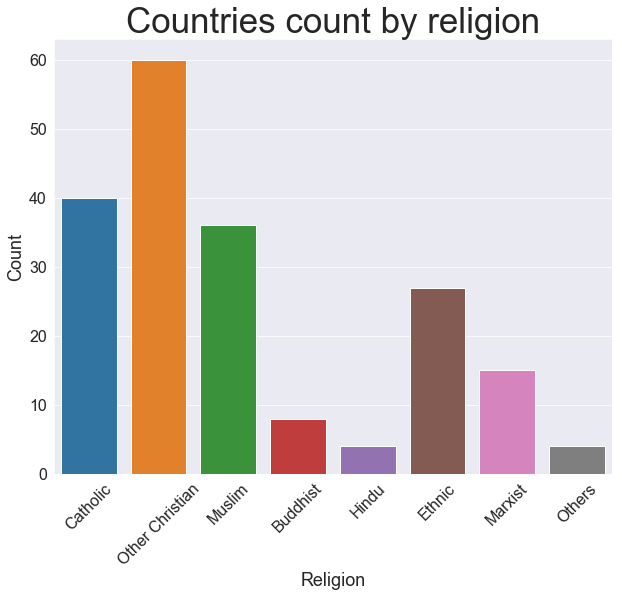

In [11]:
xticks = list(range(8))
religions = ['Catholic', 'Other Christian', 'Muslim', 'Buddhist', 'Hindu','Ethnic', 'Marxist', 'Others']

plt.figure(figsize = (10, 8))
ax = sns.countplot(flags['religion'])
plt.xlabel('Religion', size = 18)
plt.ylabel('Count', size = 18)
plt.xticks(size = 16)
plt.yticks(size = 16)
ax.set_xticks(xticks)
ax.set_xticklabels(religions, minor=False, rotation = 45)
plt.title('Countries count by religion', size = 35)

Text(0.5, 1.0, 'Population vs Area')

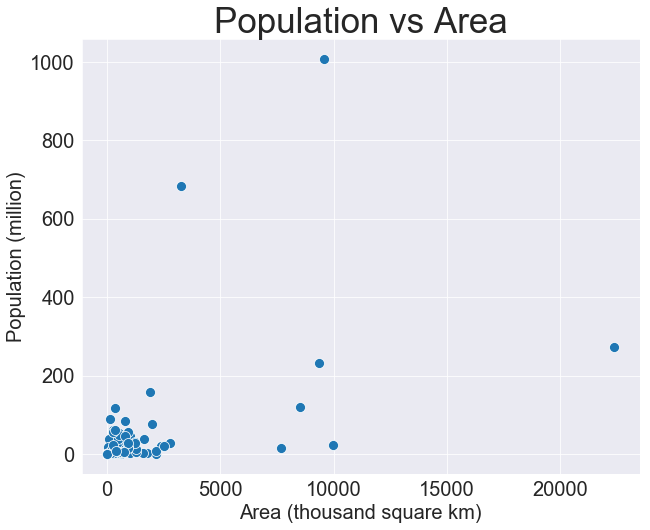

In [12]:
plt.figure(figsize = (10, 8))
sns.scatterplot(flags['area'], flags['population'], s = 100)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.xlabel('Area (thousand square km)', size = 20)
plt.ylabel('Population (million)', size = 20)
plt.title('Population vs Area', size = 35)

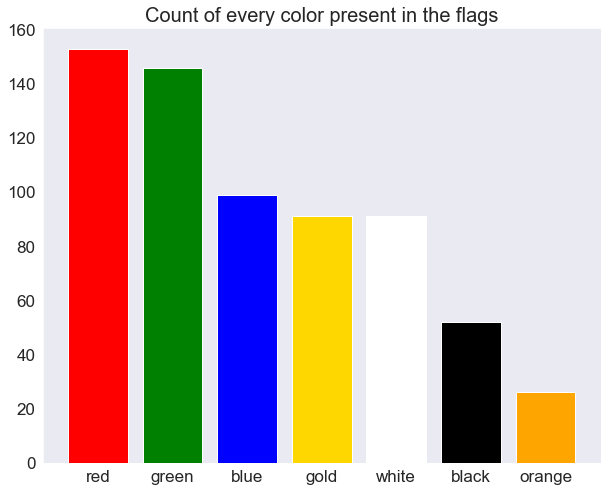

In [13]:
color = ['red', 'green', 'blue', 'gold', 'white', 'black', 'orange']
color_count = []


for col in color:
    color_count.append(sum(flags[col] == '1'))

plt.figure(figsize = (10, 8))
plt.bar(color, sorted(color_count, reverse = True), color = color)
plt.xticks(size = 17)
plt.yticks(size = 17)
plt.title('Count of every color present in the flags', size = 20)
plt.grid()

Text(0.5, 1.0, 'Area size of countries by religion')

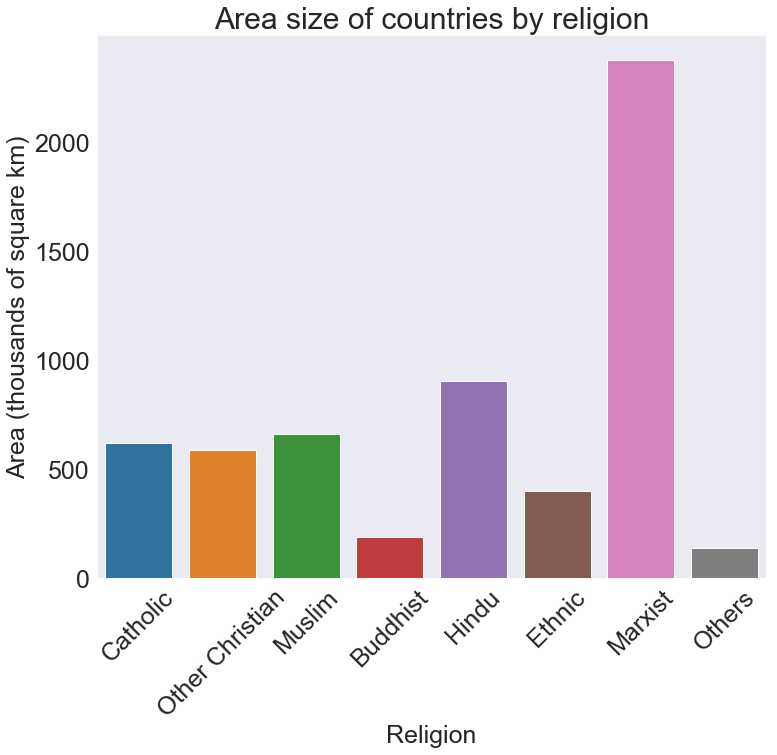

In [14]:
xticks = list(range(8))
religions = ['Catholic', 'Other Christian', 'Muslim', 'Buddhist', 'Hindu','Ethnic', 'Marxist', 'Others']

plt.figure(figsize = (12, 10))
plt.grid()
ax = sns.barplot(flags['religion'], flags['area'], ci = None)
plt.xticks(size = 25)
plt.yticks(size = 25)
ax.set_xticks(xticks)
ax.set_xticklabels(religions, minor = False, rotation = 45)
plt.xlabel('Religion', size = 25)
plt.ylabel('Area (thousands of square km)', size = 25)
plt.title('Area size of countries by religion', size = 30)

## Encoding and Scaling

In [15]:
flags_clean = pd.get_dummies(flags.drop(['name'], axis = 1))
flags_clean.columns

Index(['area', 'population', 'religion', 'bars', 'stripes', 'colours',
       'circles', 'crosses', 'saltires', 'quarters', 'sunstars', 'landmass_1',
       'landmass_2', 'landmass_3', 'landmass_4', 'landmass_5', 'landmass_6',
       'zone_1', 'zone_2', 'zone_3', 'zone_4', 'language_1', 'language_10',
       'language_2', 'language_3', 'language_4', 'language_5', 'language_6',
       'language_7', 'language_8', 'language_9', 'red_0', 'red_1', 'green_0',
       'green_1', 'blue_0', 'blue_1', 'gold_0', 'gold_1', 'white_0', 'white_1',
       'black_0', 'black_1', 'orange_0', 'orange_1', 'mainhue_black',
       'mainhue_blue', 'mainhue_brown', 'mainhue_gold', 'mainhue_green',
       'mainhue_orange', 'mainhue_red', 'mainhue_white', 'crescent_0',
       'crescent_1', 'triangle_0', 'triangle_1', 'icon_0', 'icon_1',
       'animate_0', 'animate_1', 'text_0', 'text_1', 'topleft_black',
       'topleft_blue', 'topleft_gold', 'topleft_green', 'topleft_orange',
       'topleft_red', 'topleft_whit

In [16]:
X = flags_clean.drop('religion', axis = 1)
y = flags_clean['religion']
print(X.shape)
print(y.shape)

(194, 77)
(194,)


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, stratify = y)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
# Function for GridSearchCV 

from sklearn.model_selection import KFold

kf = KFold(n_splits = 5, shuffle = True, random_state = 42)

def grid_cv(model, params):
    '''This function applies GridSearchCV to 'model' across 'kf' folds with all hyperparameters 'params' 
    and returns the average score out of all folds.
    '''
    gcv = GridSearchCV(model, cv = kf, param_grid = params)
    gcv.fit(X_train_scaled, y_train)
    return ('GCV best params:', gcv.best_params_,'GCV best score:', gcv.best_score_,'Test score:',
            gcv.score(X_test_scaled, y_test))

# Modeling

## Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import cross_val_score

lr = LogisticRegression(random_state = 42)

lr_scores = cross_val_score(lr, X_train_scaled, y_train, cv = 5)

lr.fit(X_train_scaled, y_train)

print('Cross Val Score:', np.mean(lr_scores))
print('Train score:',lr.score(X_train_scaled, y_train))
print('Test score:',lr.score(X_test_scaled, y_test))

Cross Val Score: 0.6583077905491699
Train score: 0.9862068965517241
Test score: 0.5918367346938775


In [20]:
from sklearn.model_selection import GridSearchCV

lr_params = {'C': [0.001, 0.01, 0.1, 1, 2, 5, 10]}

grid_cv(lr, lr_params)

('GCV best params:',
 {'C': 0.1},
 'GCV best score:',
 0.7034482758620689,
 'Test score:',
 0.673469387755102)

## KNN

In [21]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn_scores = cross_val_score(knn, X_train_scaled, y_train, cv = 5)

knn.fit(X_train_scaled, y_train)

print('Cross Val Score:', np.mean(knn_scores))
print('Train score:',knn.score(X_train_scaled, y_train))
print('Test score:',knn.score(X_test_scaled, y_test))

Cross Val Score: 0.5811334610472543
Train score: 0.7379310344827587
Test score: 0.5306122448979592


In [22]:
knn_params = {'n_neighbors': [1, 3, 5, 7, 9, 11]}

grid_cv(knn, knn_params)

('GCV best params:',
 {'n_neighbors': 11},
 'GCV best score:',
 0.5655172413793104,
 'Test score:',
 0.42857142857142855)

## SVC

In [23]:
from sklearn.svm import SVC

svc = SVC(class_weight = 'balanced')

svc_scores = cross_val_score(svc, X_train_scaled, y_train, cv = 5)
svc.fit(X_train_scaled, y_train)

print('Cross Val Score:', np.mean(svc_scores))
print('Train score:',svc.score(X_train_scaled, y_train))
print('Test score:',svc.score(X_test_scaled, y_test))

Cross Val Score: 0.5875702426564495
Train score: 0.9172413793103448
Test score: 0.5714285714285714


In [24]:
svc_params = {'C': [0.001, 0.01, 0.1, 1, 2, 5, 10, 20], 'degree': [3, 4, 5]}

grid_cv(svc, svc_params)

('GCV best params:',
 {'C': 5, 'degree': 3},
 'GCV best score:',
 0.6068965517241379,
 'Test score:',
 0.5918367346938775)

## Naive Bayes

In [25]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb_scores = cross_val_score(nb, X_train_scaled, y_train, cv = 5)
nb.fit(X_train_scaled, y_train)

print('Cross Val Score:', np.mean(nb_scores))
print('Train score:',nb.score(X_train_scaled, y_train))
print('Test score:',nb.score(X_test_scaled, y_test))

Cross Val Score: 0.5621551724137931
Train score: 0.7931034482758621
Test score: 0.5714285714285714


## Decision Tree

In [26]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(class_weight = 'balanced')

dt_scores = cross_val_score(dt, X_train_scaled, y_train, cv = 5)

dt.fit(X_train_scaled, y_train)

print('Cross Val Score:', np.mean(dt_scores))
print('Train score:',dt.score(X_train_scaled, y_train))
print('Test score:',dt.score(X_test_scaled, y_test))

Cross Val Score: 0.5817800127713921
Train score: 1.0
Test score: 0.5510204081632653


In [27]:
dt_params = {'criterion': ['gini', 'entropy'],
             'max_depth': [5, 7, 9, 11],
             'min_samples_split': [5, 6, 7],
             'max_features': [5, 7, 9]}

grid_cv(dt, dt_params)

('GCV best params:',
 {'criterion': 'gini',
  'max_depth': 7,
  'max_features': 7,
  'min_samples_split': 7},
 'GCV best score:',
 0.5172413793103449,
 'Test score:',
 0.4897959183673469)

### Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state = 42, class_weight = 'balanced')

rf_scores = cross_val_score(rf, X_train_scaled, y_train, cv = 5)

rf.fit(X_train_scaled, y_train)

print('Cross Val Score:', np.mean(rf_scores))
print('Train score:',rf.score(X_train_scaled, y_train))
print('Test score:',rf.score(X_test_scaled, y_test))

Cross Val Score: 0.5987212643678161
Train score: 0.993103448275862
Test score: 0.6530612244897959


In [29]:
rf_params_1 = {'n_estimators': [10, 20, 50, 100], 'max_features': [5, 7, 9]}

rf_grid = GridSearchCV(rf, param_grid = rf_params_1, cv = 5, n_jobs = -1)

rf_grid.fit(X_train_scaled, y_train)

rf_params_2 = {'min_samples_split': [5, 7, 9], 'max_depth': [7, 9, 11], 'criterion': ['gini', 'entropy']}

rf_grid_2 = GridSearchCV(rf_grid.best_estimator_, param_grid = rf_params_2, cv = 5, n_jobs = -1)

rf_grid_2.fit(X_train_scaled, y_train)

print('GSCV best score:',rf_grid_2.best_score_)
print('Train score:', rf_grid_2.score(X_train_scaled, y_train))
print('Test score:', rf_grid_2.score(X_test_scaled, y_test))
print()
rf_grid.best_params_.update(rf_grid_2.best_params_)
print('Best params:', rf_grid.best_params_)

GSCV best score: 0.696551724137931
Train score: 0.9655172413793104
Test score: 0.6938775510204082

Best params: {'max_features': 9, 'n_estimators': 100, 'criterion': 'entropy', 'max_depth': 7, 'min_samples_split': 5}


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76]),
 <a list of 77 Text xticklabel objects>)

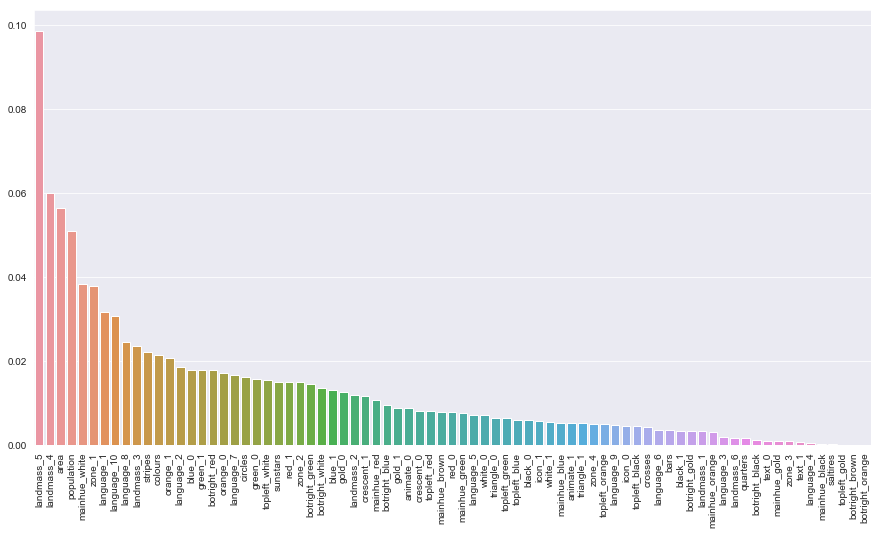

In [30]:
rf_importances  = rf_grid_2.best_estimator_.feature_importances_
rf_features = X.columns

feat_importances = sorted(list(zip(rf_features, rf_importances)), key=lambda x:x[1], reverse=True)

import seaborn as sns

plt.figure(figsize=(15,8))
sns.barplot([a[0] for a in feat_importances], [b[1] for b in feat_importances])
plt.xticks(rotation=90)

### Gradient Boosting

In [31]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state = 42)

gb_scores = cross_val_score(gb, X_train_scaled, y_train, cv = 5)

gb.fit(X_train_scaled, y_train)

print('Cross Val Score:', np.mean(gb_scores))
print('Train score:',gb.score(X_train_scaled, y_train))
print('Test score:',gb.score(X_test_scaled, y_test))

Cross Val Score: 0.6540948275862069
Train score: 1.0
Test score: 0.6326530612244898


In [32]:
gb_params_1 = {'n_estimators': [50, 100, 150, 200], 
               'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5], 
               'max_features': [5, 7, 9]}
    
gb_grid = GridSearchCV(gb, param_grid = gb_params_1, cv = 5, n_jobs = -1)

gb_grid.fit(X_train_scaled, y_train)

gb_params_2 = {'min_samples_split': [5, 7, 9], 
               'min_samples_leaf': [3, 5, 7], 
               'max_depth': [7, 9, 11]}

gb_grid_2 = GridSearchCV(gb_grid.best_estimator_, param_grid = gb_params_2, cv = 5, n_jobs = -1)

gb_grid_2.fit(X_train_scaled, y_train)

print('GSCV best score:',gb_grid_2.best_score_)
print('Train score:', gb_grid_2.score(X_train_scaled, y_train))
print('Test score:', gb_grid_2.score(X_test_scaled, y_test))
print()
gb_grid.best_params_.update(gb_grid_2.best_params_)
print('Best params:', gb_grid.best_params_)

GSCV best score: 0.7172413793103448
Train score: 1.0
Test score: 0.6530612244897959

Best params: {'learning_rate': 0.3, 'max_features': 9, 'n_estimators': 50, 'max_depth': 9, 'min_samples_leaf': 3, 'min_samples_split': 9}


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76]),
 <a list of 77 Text xticklabel objects>)

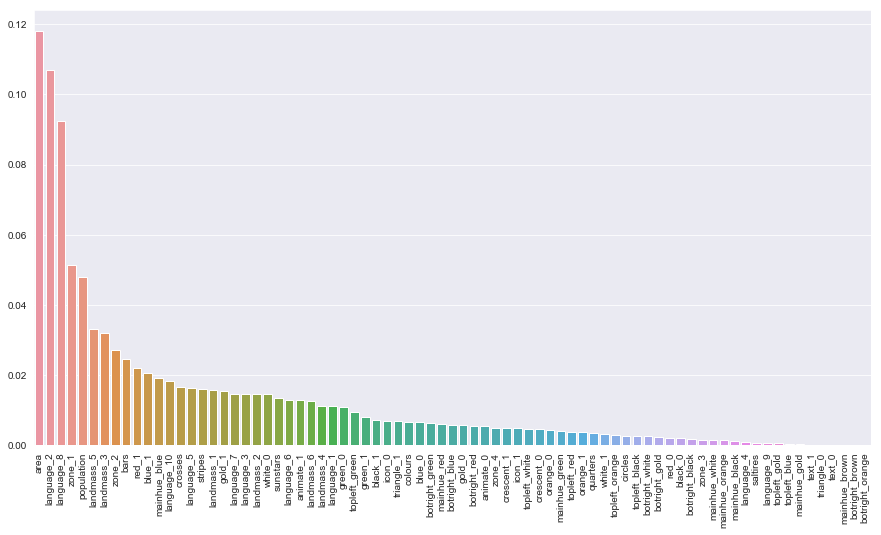

In [33]:
gb_importances  = gb_grid_2.best_estimator_.feature_importances_
gb_features = X.columns

feat_importances_gb = sorted(list(zip(gb_features, gb_importances)), key=lambda x:x[1], reverse=True)

import seaborn as sns

plt.figure(figsize=(15,8))
sns.barplot([a[0] for a in feat_importances_gb], [b[1] for b in feat_importances_gb])
plt.xticks(rotation=90)

In [34]:
from sklearn.metrics import confusion_matrix

gb_pred = gb_grid_2.predict(X_test_scaled)

confusion_matrix(gb_pred, y_test)

array([[ 9,  1,  0,  0,  0,  0,  2,  0],
       [ 1, 14,  1,  0,  1,  2,  0,  0],
       [ 0,  0,  4,  0,  0,  1,  0,  0],
       [ 0,  0,  1,  1,  0,  0,  2,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  3,  0,  0,  4,  0,  1],
       [ 0,  0,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0]])

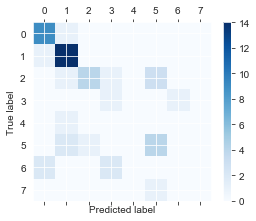

In [35]:
plt.matshow(confusion_matrix(y_test, gb_pred), cmap="Blues")
plt.colorbar(shrink=0.8)
plt.xticks(range(8))
plt.yticks(range(8))
plt.xlabel("Predicted label")
plt.ylabel("True label");

In [36]:
y_test.value_counts()

1    15
0    10
2     9
5     7
6     4
3     2
7     1
4     1
Name: religion, dtype: int64

In [37]:
np.unique(gb_pred, return_counts = True)

(array([0, 1, 2, 3, 5, 6]), array([12, 19,  5,  4,  8,  1]))

#### Conclusions

- The model predicted '1' best because there's many observations in test set, but did not predict '7' since there's only one observation in the test set
- The higher the observation of the class, the better the model's prediction of that class
- It's bad to predict religion based on flags because some countries design flags based on religion but not others

# Score Summary (GridSearchCV)

In [40]:
print('Grid Search CV\n')
print('Logistic Regression:\n')
print(grid_cv(lr, lr_params), '\n\n')
print('KNN:\n')
print(grid_cv(knn, knn_params), '\n\n')
print('SVC:\n')
print(grid_cv(svc, svc_params), '\n\n')
print('Decision Tree:\n')
print(grid_cv(dt, dt_params), '\n\n')
print('Random Forest:\n')
print('Best params:', rf_grid.best_params_)
print('GSCV best score:',rf_grid_2.best_score_)
print('Test score:', rf_grid_2.score(X_test_scaled, y_test))
print('\n\n')
print('Gradient Boosting:\n')
print('Best params:', gb_grid.best_params_)
print('GSCV best score:',gb_grid_2.best_score_)
print('Test score:', gb_grid_2.score(X_test_scaled, y_test))

Grid Search CV

Logistic Regression:

('GCV best params:', {'C': 0.1}, 'GCV best score:', 0.7034482758620689, 'Test score:', 0.673469387755102) 


KNN:

('GCV best params:', {'n_neighbors': 11}, 'GCV best score:', 0.5655172413793104, 'Test score:', 0.42857142857142855) 


SVC:

('GCV best params:', {'C': 5, 'degree': 3}, 'GCV best score:', 0.6068965517241379, 'Test score:', 0.5918367346938775) 


Decision Tree:

('GCV best params:', {'criterion': 'gini', 'max_depth': 7, 'max_features': 9, 'min_samples_split': 6}, 'GCV best score:', 0.5448275862068965, 'Test score:', 0.40816326530612246) 


Random Forest:

Best params: {'max_features': 9, 'n_estimators': 100, 'criterion': 'entropy', 'max_depth': 7, 'min_samples_split': 5}
GSCV best score: 0.696551724137931
Test score: 0.6938775510204082



Gradient Boosting:

Best params: {'learning_rate': 0.3, 'max_features': 9, 'n_estimators': 50, 'max_depth': 9, 'min_samples_leaf': 3, 'min_samples_split': 9}
GSCV best score: 0.7172413793103448
Test s